In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    

# 1. 히스토그램 계산

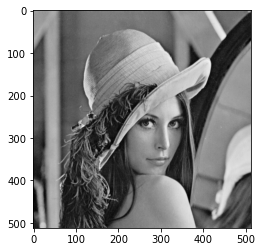

In [19]:
# src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
imshow("", src)

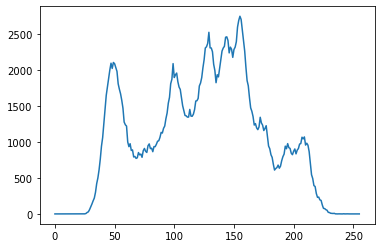

In [20]:
np.set_printoptions(precision=7,suppress=True) # 소수점 자리 조절 가능.

histSize = [256]
histRange = [0, 256]

hist = cv2.calcHist([src], [0], None, histSize, histRange)
# print(hist)
plt.plot(hist) # 너무나 좁은 영역에 어두운 것 밝은 게 있기 때문에. 명암비가 떨어지겠구나.

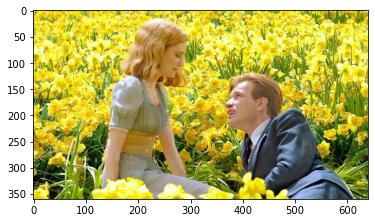

In [40]:
# src = cv2.imread('butterfly.jpg')
# src = cv2.imread('img/chromakey.jpg')
src = cv2.imread('img/bg.jpg')
imshow("", src)

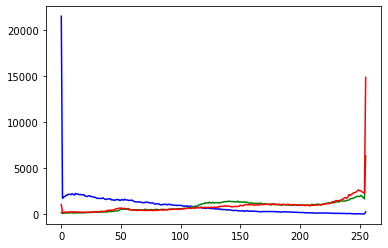

In [41]:
# src = cv2.cvtColor('image', cv2.COLOR_BGR2RGB)

histB = cv2.calcHist([src], [0], None, histSize, histRange)
histG = cv2.calcHist([src], [1], None, histSize, histRange)
histR = cv2.calcHist([src], [2], None, histSize, histRange)
# 채널의 의미에 따라 값을 달라질 수 있다.?
# 
plt.plot(histB, 'b')
plt.plot(histG, 'g')
plt.plot(histR, 'r')

---
# 히스토그램 스트레칭
<img src="img/스트레칭.png">
$dst(x,y) = \frac{src(x,y)-G_{min}}{G_{max}-G_{min}}\times 255$

In [56]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
# src = cv2.imread('night.jpg', cv2.IMREAD_GRAYSCALE)
gmin = float(np.min(src)) # 최대값
gmax = float(np.max(src)) # 최소값

dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8) 
# 굳이 클리핑연산 필요 없음.

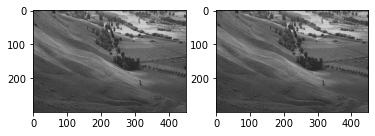

In [57]:
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

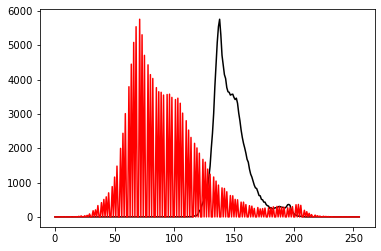

In [58]:
# 히스토그램을 각각 구해서 한 화면에 보이도록 그려보자.
histSrc = cv2.calcHist([src], [0], None, histSize, histRange) # 원본영상
histDst = cv2.calcHist([dst], [0], None, histSize, histRange) # 목적영상
plt.plot(histSrc, 'k') # 원본
plt.plot(histDst, 'r') # 히스토그램 스트레칭

## 히스토그램 평활화

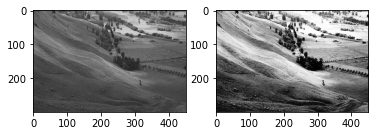

In [60]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)


---
colab

In [62]:
# cv2_imshow(dst)

In [65]:
# cv2_imshow(src)

---

In [63]:
import cv2
cv2.imshow('원본', src)
cv2.imshow('변환', dst)


cv2.waitKey()
cv2.destroyAllWindows()



미니 quiz
히스토그램 싸

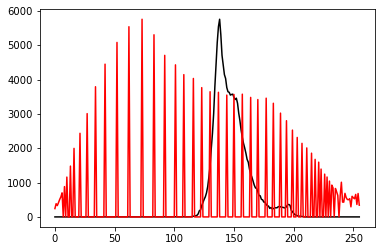

In [66]:
histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

In [67]:
a = np.array([1,5,4,3])

b = np.cumsum(a)
print(b)

[ 1  6 10 13]


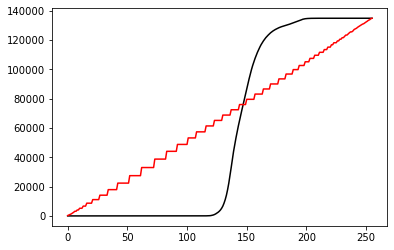

In [68]:
# 누적 히스토그램 그래프 그리기.
# cumsum은 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수.
histSrc_c = np.cumsum(histSrc) # 합
histDst_c = np.cumsum(histDst) # 합
plt.plot(histSrc_c, 'k')
plt.plot(histDst_c, 'r') 

---

흑백

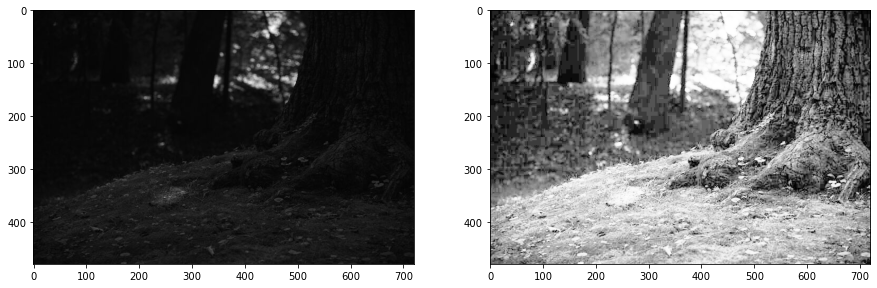

In [73]:
src = cv2.imread('darkness.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

---
감마

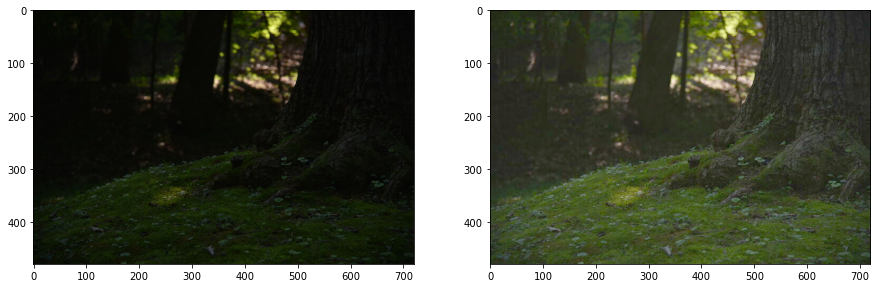

In [74]:
src = cv2.imread("darkness.jpg") 
gamma = 0.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
dst = cv2.LUT(src, lut)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

---
# 필터
##  엠보싱 필터

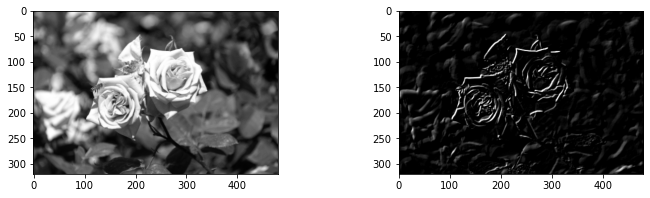

In [77]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

emboss = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=0) # -255 0 255 
                                             #     128

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

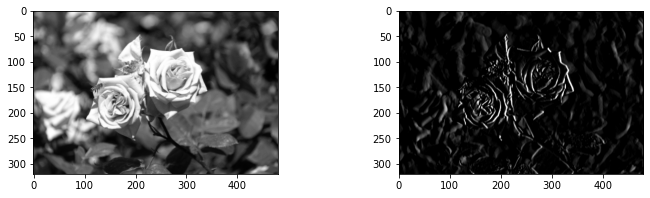

In [81]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

edge = np.array([   [1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], np.float32) # 바뀐부분

dst = cv2.filter2D(src, -1, edge, delta=0) # -1 : 원본과 같은 타입(uibt-8)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

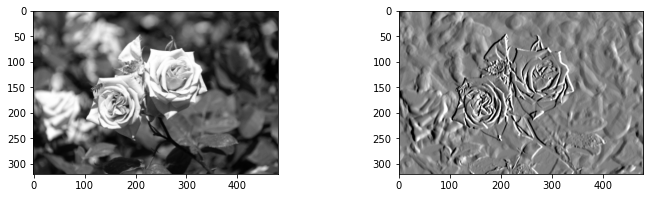

In [80]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

edge = np.array([   [1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], np.float32)

dst = cv2.filter2D(src, -1, edge, delta=128) # 바뀐 부분, 확인용도

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

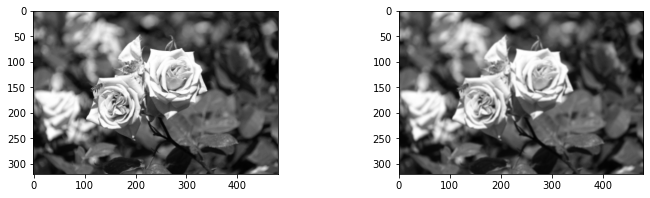

In [83]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

avg = np.array([   [1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], np.float32) / 9
                   
dst = cv2.filter2D(src, -1, avg, delta=0)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

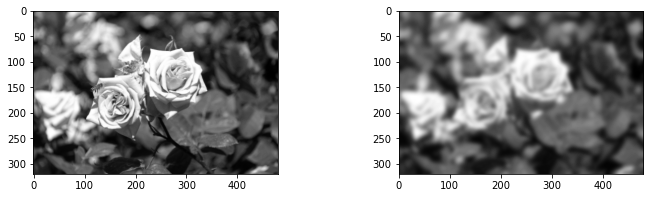

In [103]:
dst = cv2.filter2D(dst, -1, avg, delta=0)
plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

## 블러 필터

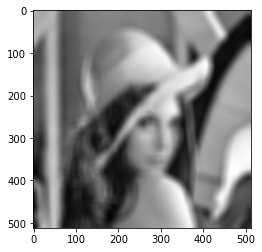

In [106]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.blur(src, (21, 21))

imshow("", dst)

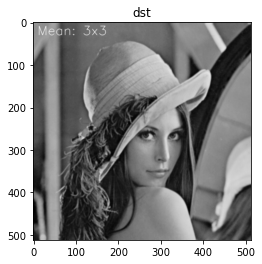

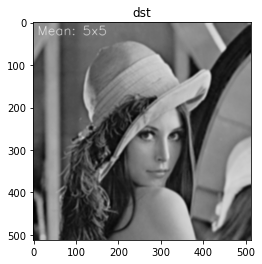

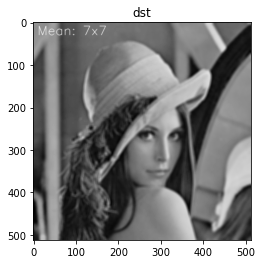

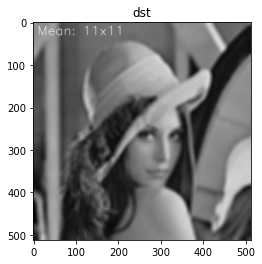

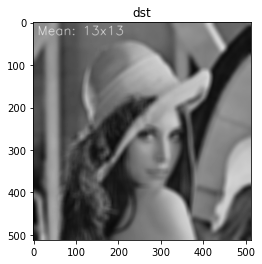

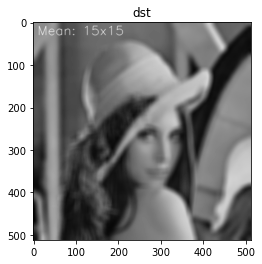

In [109]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

for ksize in (3,5,7,11,13,15) :
  dst = cv2.blur(src, (ksize, ksize))
  desc = "Mean: %dx%d" % (ksize, ksize)
  cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)
  imshow('dst', dst)
  plt.show()

---
## 가우시안 필터

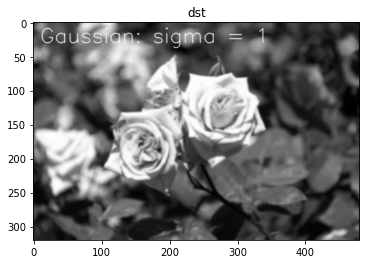

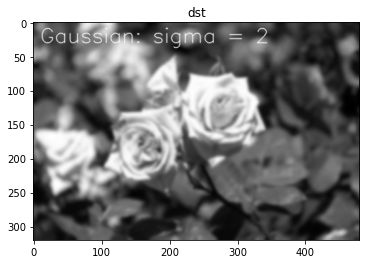

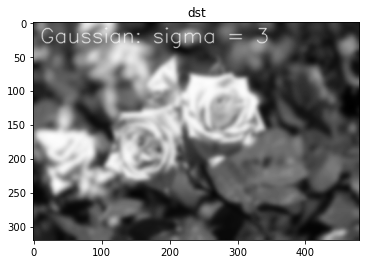

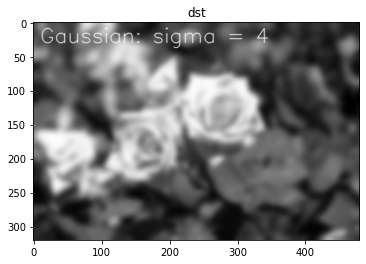

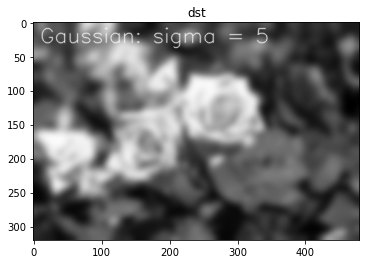

In [110]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

imshow('src', src)

for sigma in range(1, 6):
        dst = cv2.GaussianBlur(src, (0, 0), sigma) 
        ]# (0,0)이커도 블러링이 많이되나 연산시간이 오래걸림

        desc = "Gaussian: sigma = %d" % (sigma)
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)

        imshow('dst', dst)
        plt.show()

---
## 샤프닝   
날카롭다 : 고주파    
엣지근방에서 명암비가 커지도록 수정    



- 언샤프마스크 필터    
갑자기 변화는 부분에서 스무딩하게 변함   


## unshape

- 식

<img src="img/unshape.png">

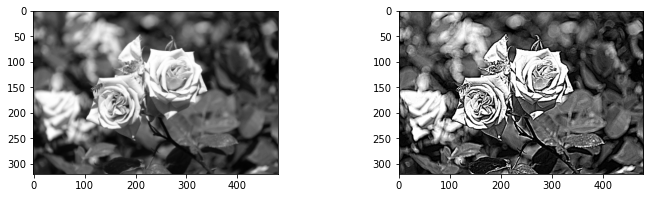

In [148]:
src = cv2.imread('img/rose.bmp', cv2.IMREAD_GRAYSCALE)
sigma = 1 # 커지면 많이 블러링도 커짐.
alpha = 11.0 # 얼마나 샤프닝을 크게 할 것이냐
blurred = cv2.GaussianBlur(src, (0,0), sigma)
# 원본영상에서 블러링된 영상만큼 뺴주면 되니까 블러링 사용
dst = cv2.addWeighted(src, 1 + alpha, blurred, -alpha, 0.0)   # 이런 함수가 있따.

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

---
## 양방향 필터

<img src="img/양방향필터.png">

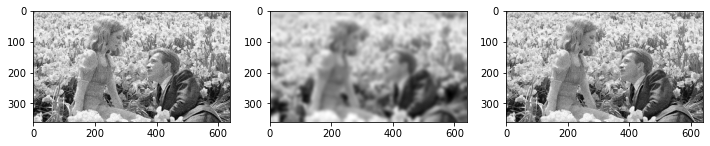

In [147]:
src = cv2.imread('img/bg.jpg', cv2.IMREAD_GRAYSCALE)

noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 0 , 20)

cv2.add(src, noise, src, dtype=cv2.CV_8UC1)

# imshow("",src)

dst1 = cv2.GaussianBlur(src, (0, 0), 5)
dst2 = cv2.bilateralFilter(src, -1, 10, 5) # -1원본타입과 동일, # 3번째 파라미터는 시그마. 

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

---
## median 필터

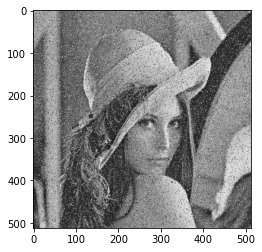

In [174]:
import random

src = cv2.imread('img/lenna.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255
imshow("",src)

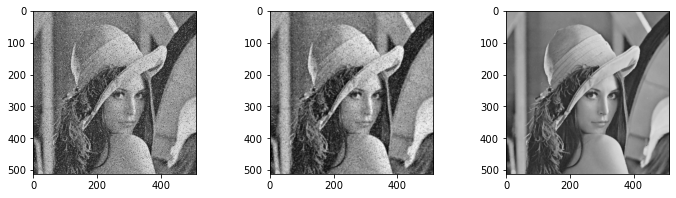

In [157]:
dst1 = cv2.GaussianBlur(src, (0, 0), 1)
dst2 = cv2.medianBlur(src, 3)

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

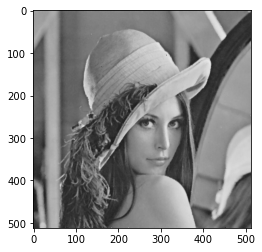

In [162]:
imshow("",dst2)

---
---
Quiz 응용    
펜으로 그린듯한 영상 변화
1. 전체 영상을 블러링.
2. 가장자리 부분들만 잘 추출해서 해당하는 부분들만 강조해주면 됨.
3. 강조된 부분들만 더해주면 됨.
4. 엣지성분만 검출해서 0이 되도록 빼주면 됨.
5. 마치 영상에 대해서 펜으로 그린듯한 느낌을 들 수 있게 할 수 있다.

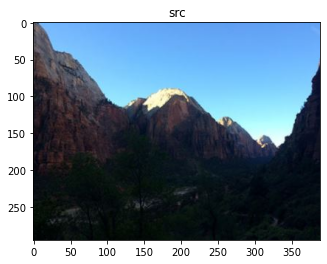

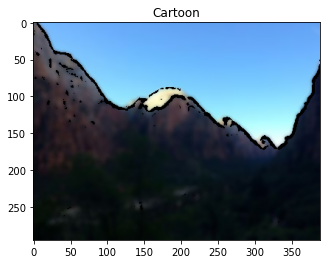

In [181]:
img = cv2.imread('img/gamma.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)

edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
# 엣지부분만 바이너리로 만든 것.
# 외곽성분은 255, 엣지부분만 0...
# 연필로 그린듯한 효과를 주기 위해서 

color = cv2.bilateralFilter(img, 9, 300, 300)
# 스무딩을 하면서 엣지부분은 보존.

cartoon = cv2.bitwise_and(color, color, mask=edge) 
# 엣지를 더해주면 됨.
# 비트와이즈 연산

imshow("src", img); plt.show()
# imshow("blur", blur); plt.show()
# imshow("edge", edge); plt.show()
# imshow("color", color); plt.show()
imshow("Cartoon", cartoon); plt.show()

---
응용 quiz2


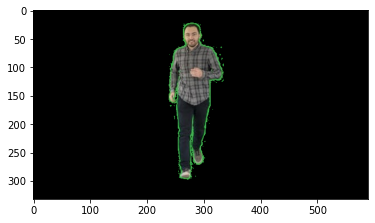

In [184]:
img = cv2.imread('img/chromakey.jpg')

height, width, _ = img.shape

for h in range(0, height):
        for w in range(0, width):
            b = img[h, w, 0]
            g = img[h, w, 1]
            r = img[h, w, 2]    
            
            if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
                img[h, w, :] = 0                
imshow("", img)

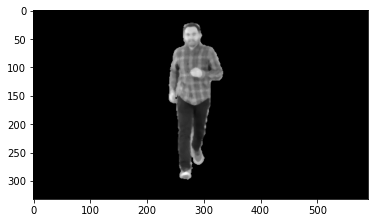

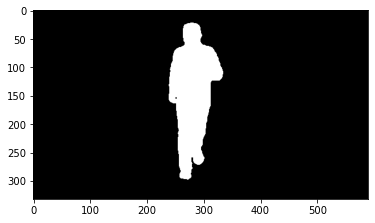

In [189]:
blur = cv2.medianBlur(img, 5)
imshow("", blur)

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
mask = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) < 1
mask = 255 - (cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) < 1) # threshold로 바꾸는 방법 진행.

imshow("", gray); plt.show()
imshow("", mask); plt.show()

---
---
# 11장.이진화와 모폴로지

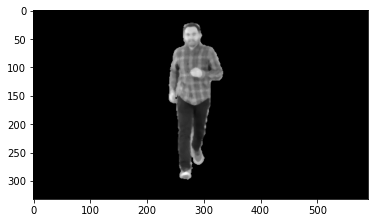

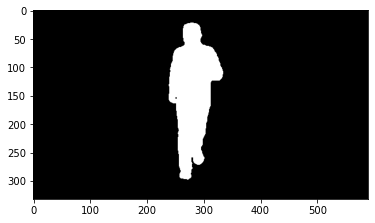

In [202]:
# threshold함수사용법
blur = cv2.medianBlur(img, 5)
imshow("", blur)

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

# th값을 자동으로 판단하려면 히스토그램으로 그려보면 가능함.
# 히스토그램 쌍봉으로 보일것.
# 자동으로 th값을 예측할 수 있을 것.
th = 10
_, mask = cv2.threshold(gray, th, 255, cv2.THRESH_BINARY)

# th값 기준 바이너리
# gray > th -> T/F로 반환. 
# (gray > th)*255 (원래는 안되는 것.)

imshow("", gray); plt.show()
imshow("", mask); plt.show()


In [ ]:
1. 히스토그램 : 
2. 평활화 : 누적분포로 뭐하는거.
3. 필터 : 픽셀값을 뭘로 설정할거냐, 산술평균, 가우시안함수, 거리에 따라 가중치를 다르게 지정. +, -보통 미분 연산이 되어서 엣지를 추출
    블러필터 : 커널크기 명시
    가우시안필터 : 시그마를 얼마나 설정할 것인가(클수록 블러)
    언샤프 : 원본영상에서 가우시안블러를 뺴자. 그만큼 더해서 엣지부분은 강화시키자.
    트릭을 이용해서 두개의 영상으로 (원본영상-평균영상) 엣지부분만 강화
    양방향필터 : 엣지부분 보존
    미디언필터 : 솔트앤페퍼
    카툰효과 :
    노이즈제거 :